In [4]:
import argparse, sys, shutil, glob, os
from pathlib import Path
from itertools import combinations
from datetime import datetime

import numpy as np
import pandas as pd
import arviz as az
# from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.special import expit, logit
from tqdm import tqdm
import pickle
# import pystan
# import stan


In [5]:
import arviz as az
from pathlib import Path

nc_path = "stan_out/rlddm_single_subject-20250924_145755.nc"  # <- your file
idata = az.from_netcdf(nc_path)


In [6]:
az.summary(idata, var_names=["alpha","a","t0","scaler"], hdi_prob=0.95)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.157,0.121,0.010,0.377,0.006,0.002,463.0,1859.0,1.0
a,1.295,0.035,1.229,1.362,0.001,0.001,1157.0,1710.0,1.0
t0,0.311,0.005,0.300,0.321,0.000,0.000,1670.0,1776.0,1.0
scaler,0.115,0.063,0.037,0.237,0.003,0.003,515.0,1256.0,1.0


In [7]:
post = az.extract(idata, var_names=["alpha","a","t0","scaler"], combined=True).to_pandas()
post.corr()


,alpha,a,t0,scaler,chain,draw
alpha,1.000000,0.441908,-0.191663,-0.647686,-7.061947e-03,-3.761342e-02
a,0.441908,1.000000,-0.498467,-0.198490,-1.673992e-02,-3.348010e-02
t0,-0.191663,-0.498467,1.000000,0.083265,4.051513e-02,1.993047e-02
scaler,-0.647686,-0.198490,0.083265,1.000000,2.549493e-02,3.317148e-02
chain,-0.007062,-0.016740,0.040515,0.025495,1.000000e+00,-1.756362e-16
draw,-0.037613,-0.033480,0.019930,0.033171,-1.756362e-16,1.000000e+00


In [8]:
# boolean mask of divergent transitions aligned to combined draws
div = idata.sample_stats["diverging"].stack(sample=("chain","draw")).values.astype(bool)
post_ok = post[~div]
post_ok.corr()


,alpha,a,t0,scaler,chain,draw
alpha,1.000000,0.440406,-0.196156,-0.645821,-0.005881,-0.036412
a,0.440406,1.000000,-0.500877,-0.179877,-0.015973,-0.035758
t0,-0.196156,-0.500877,1.000000,0.081829,0.038624,0.019205
scaler,-0.645821,-0.179877,0.081829,1.000000,0.019119,0.026338
chain,-0.005881,-0.015973,0.038624,0.019119,1.000000,-0.001195
draw,-0.036412,-0.035758,0.019205,0.026338,-0.001195,1.000000


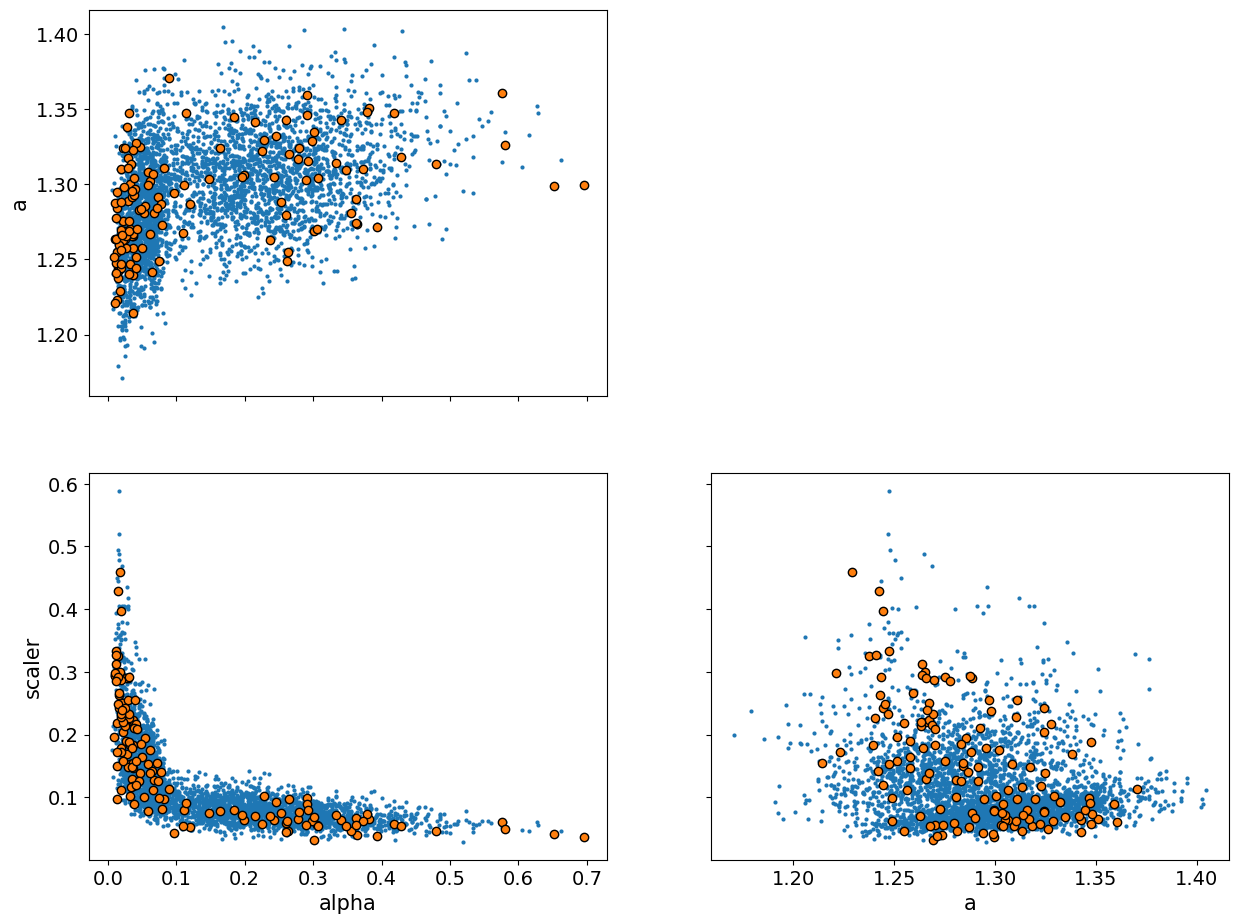

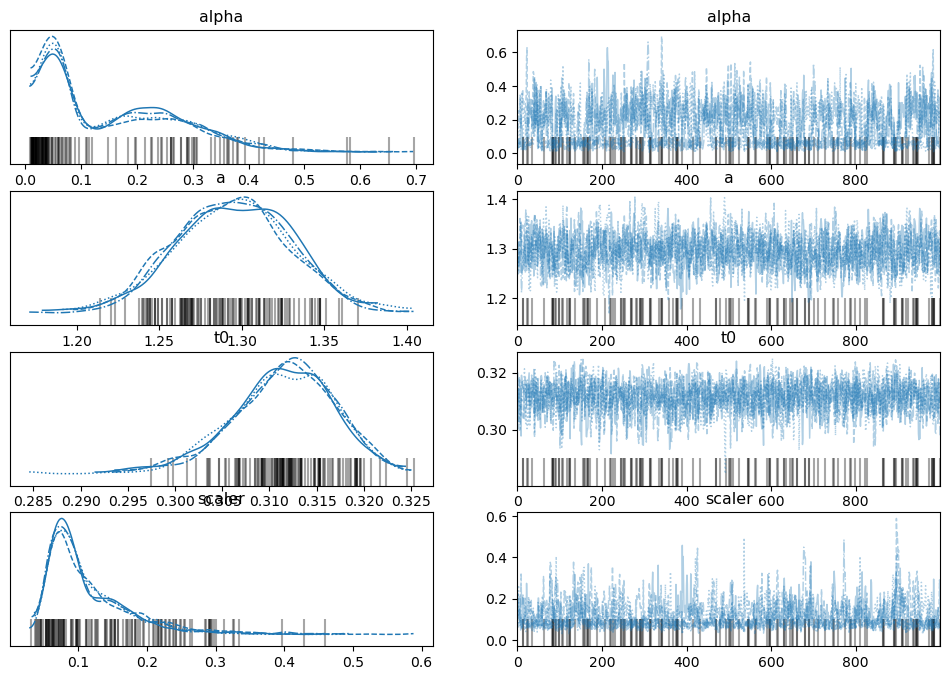

In [9]:
az.plot_pair(idata, var_names=["alpha","a","scaler"], kind="scatter", divergences=True);
az.plot_trace(idata, var_names=["alpha","a","t0","scaler"]);


In [11]:
int(idata.sample_stats["diverging"].sum())
int((idata.sample_stats["tree_depth"] == idata.sample_stats["tree_depth"].max()).sum())


146